# IMPORTING NECESSARY LIBRARIES

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import io
%cd "C:\Users\saketh\Desktop\python\pythonmockevaluation"

C:\Users\saketh\Desktop\python\pythonmockevaluation


In [4]:
telcochurn=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# EDA

In [5]:
telcochurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telcochurn.TotalCharges=pd.to_numeric(telcochurn.TotalCharges,errors='coerce')

## CHECKING NULL VALUES 

In [8]:
telcochurn.isna().sum().sort_values(ascending=False)

TotalCharges        11
customerID           0
DeviceProtection     0
MonthlyCharges       0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
gender               0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
tenure               0
Dependents           0
Partner              0
SeniorCitizen        0
Churn                0
dtype: int64

In [9]:
telcochurn.dropna(inplace=True)

In [10]:
telcochurn.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [11]:
telcochurn.shape

(7032, 21)

In [12]:
telcochurn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [13]:
telcochurn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
telcochurn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<AxesSubplot:ylabel='Frequency'>

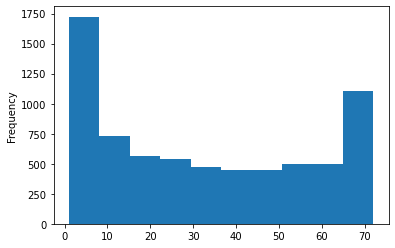

In [15]:
telcochurn.tenure.plot(kind="hist")

<AxesSubplot:>

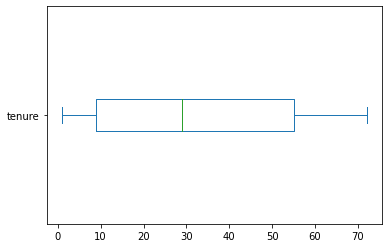

In [16]:
telcochurn.tenure.plot(kind="box",vert=False)

<AxesSubplot:ylabel='Density'>

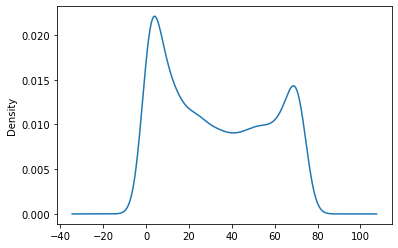

In [17]:
telcochurn.tenure.plot(kind="density")

# Monthly charges

<AxesSubplot:ylabel='Frequency'>

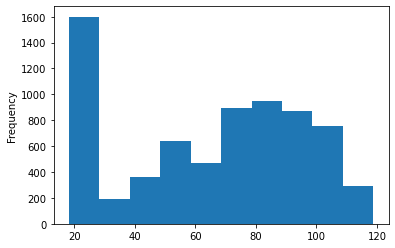

In [18]:
telcochurn.MonthlyCharges.plot(kind="hist")

<AxesSubplot:>

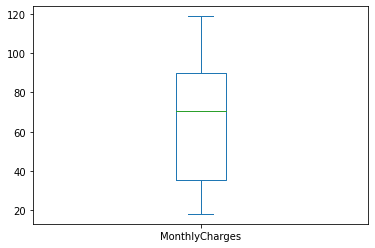

In [19]:
telcochurn.MonthlyCharges.plot(kind="box")

<AxesSubplot:ylabel='Density'>

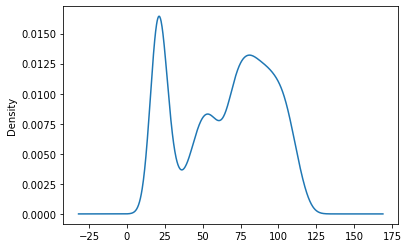

In [20]:
telcochurn.MonthlyCharges.plot(kind="density")

<AxesSubplot:>

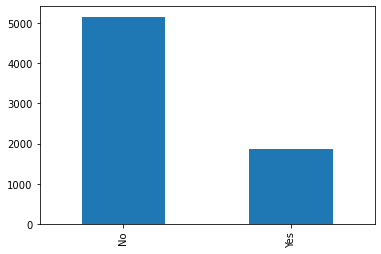

In [21]:
telcochurn.Churn.value_counts().plot(kind="bar")

<AxesSubplot:>

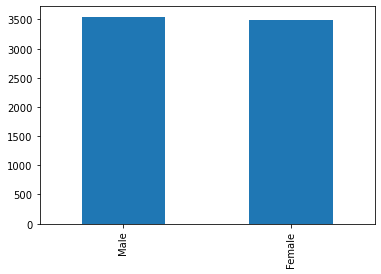

In [22]:
telcochurn.gender.value_counts().plot(kind="bar")

<AxesSubplot:>

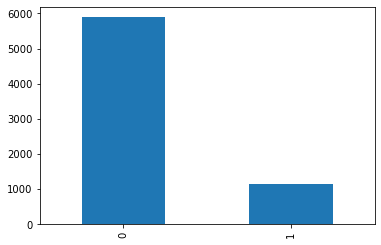

In [23]:
telcochurn.SeniorCitizen.value_counts().plot(kind="bar")

<AxesSubplot:>

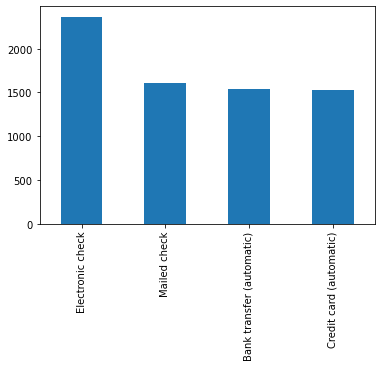

In [24]:
telcochurn.PaymentMethod.value_counts().plot(kind="bar")

### Cross Tabulation and bar plot

<AxesSubplot:xlabel='Churn'>

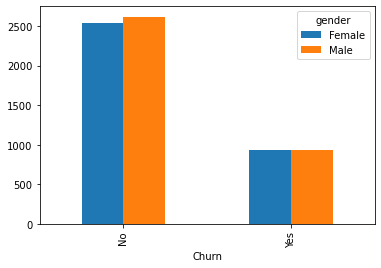

In [25]:
pd.crosstab(telcochurn.Churn,telcochurn.gender).plot(kind="bar")

<AxesSubplot:xlabel='Churn'>

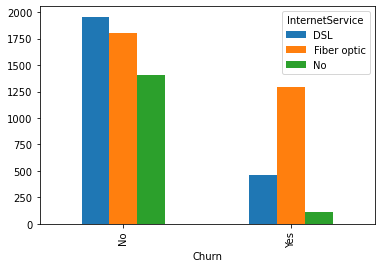

In [26]:
pd.crosstab(telcochurn.Churn,telcochurn.InternetService).plot(kind="bar")

<AxesSubplot:xlabel='gender'>

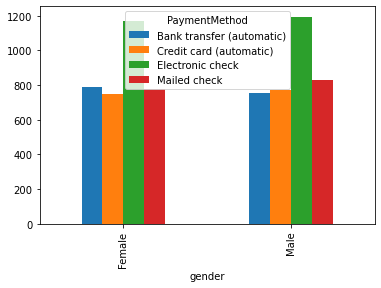

In [27]:
pd.crosstab(telcochurn.gender,telcochurn.PaymentMethod).plot(kind="bar")

### groupby() and bar plot

In [28]:
telcochurn.MonthlyCharges.groupby(telcochurn.gender).mean()

gender
Female    65.216652
Male      64.387546
Name: MonthlyCharges, dtype: float64

In [29]:
telcochurn.tenure.groupby(telcochurn.SeniorCitizen).mean()

SeniorCitizen
0    32.252292
1    33.295972
Name: tenure, dtype: float64

In [30]:
telcochurn.tenure.groupby(telcochurn.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    43.713359
Credit card (automatic)      43.297830
Electronic check             25.174630
Mailed check                 21.938903
Name: tenure, dtype: float64

In [31]:
telcochurn.tenure.groupby(telcochurn.InternetService).mean()

InternetService
DSL            32.889487
Fiber optic    32.917959
No             30.667763
Name: tenure, dtype: float64

In [32]:
telcochurn.MonthlyCharges.groupby(telcochurn.StreamingMovies).mean()

StreamingMovies
No                     65.440579
No internet service    21.076283
Yes                    88.478506
Name: MonthlyCharges, dtype: float64

# Hypothesis Testing

In [33]:
from scipy.stats import ttest_ind

In [34]:
# Split Data Frame into Churnyes & churnno
churnyes=telcochurn[telcochurn.Churn=="Yes"]
churnno=telcochurn[telcochurn.Churn=="No"]

In [35]:
print(churnyes.shape)
print(churnno.shape)

(1869, 21)
(5163, 21)


In [36]:
ttest_ind(churnyes.MonthlyCharges,churnno.MonthlyCharges,equal_var=False)
# Since pvalue=2.657357144516026e-72 is less than 0.05, REJECT NULL

Ttest_indResult(statistic=18.34091879095257, pvalue=2.657357144516026e-72)

In [37]:
ttest_ind(churnyes.tenure,churnno.tenure,equal_var=False)

Ttest_indResult(statistic=-34.971870097503476, pvalue=2.347074718895754e-234)

In [38]:
# Test Null Average MonthlyCharges of different different paymentmethod equal?
telcochurn.MonthlyCharges.groupby(telcochurn.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    67.205577
Credit card (automatic)      66.519264
Electronic check             76.255814
Mailed check                 43.958354
Name: MonthlyCharges, dtype: float64

In [39]:
# Test Null Avearge tenure of different PaymentMethod is Equal?
telcochurn.tenure.groupby(telcochurn.PaymentMethod).mean()

PaymentMethod
Bank transfer (automatic)    43.713359
Credit card (automatic)      43.297830
Electronic check             25.174630
Mailed check                 21.938903
Name: tenure, dtype: float64

In [40]:
pd.crosstab(telcochurn.gender,telcochurn.Churn)

Churn,No,Yes
gender,,
Female,2544,939
Male,2619,930


In [41]:
pd.crosstab(telcochurn.SeniorCitizen,telcochurn.Churn)

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


# Label Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
lb=LabelEncoder()

In [44]:
for col in telcochurn.columns:
    if telcochurn[col].dtype==object:
        telcochurn[col]=lb.fit_transform(telcochurn[col])

In [45]:
telcochurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [46]:
telcochurn.drop('customerID',axis=1,inplace=True)

In [47]:
telcochurn.shape

(7032, 20)

In [48]:
x=telcochurn.drop('Churn',axis=1)
y=telcochurn.Churn

## Spliting of Dataset

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,stratify=y)

# LogisticRegression

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
log=LogisticRegression(max_iter=500)

In [53]:
logmodel=log.fit(x_train,y_train)

In [54]:
logmodel.score(x_train,y_train)

0.8051605038602194

In [55]:
from sklearn.metrics import confusion_matrix,classification_report

In [56]:
log_pred=logmodel.predict(x_test)

In [57]:
confusion_matrix(y_test,log_pred)

array([[1369,  180],
       [ 241,  320]], dtype=int64)

In [58]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1549
           1       0.64      0.57      0.60       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.73      2110
weighted avg       0.79      0.80      0.80      2110



# DecisionTreeClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
tree=DecisionTreeClassifier()

In [61]:
treemodel=tree.fit(x_train,y_train)

In [62]:
treemodel.score(x_train,y_train)

0.9981714750101585

In [63]:
tree_pred=treemodel.predict(x_test)

In [64]:
confusion_matrix(y_test,tree_pred)

array([[1263,  286],
       [ 269,  292]], dtype=int64)

In [65]:
print(classification_report(y_test,tree_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1549
           1       0.51      0.52      0.51       561

    accuracy                           0.74      2110
   macro avg       0.66      0.67      0.67      2110
weighted avg       0.74      0.74      0.74      2110



# RandomForestClassifier

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf=RandomForestClassifier()

In [68]:
rfmodel=rf.fit(x_train,y_train)

In [69]:
rfmodel.score(x_train,y_train)

0.9981714750101585

In [70]:
rf_pred=rfmodel.predict(x_test)

In [71]:
confusion_matrix(y_test,rf_pred)

array([[1392,  157],
       [ 294,  267]], dtype=int64)

In [72]:
print(classification_report(y_test,rf_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1549
           1       0.63      0.48      0.54       561

    accuracy                           0.79      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.79      0.78      2110



# GradientBoostingClassifier

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

In [74]:
gbm=GradientBoostingClassifier()

In [75]:
gbmmodel=gbm.fit(x_train,y_train)

In [76]:
gbmmodel.score(x_train,y_train)

0.833604225924421

In [77]:
gbm_pred=gbmmodel.predict(x_test)

In [78]:
confusion_matrix(y_test,gbm_pred)

array([[1393,  156],
       [ 268,  293]], dtype=int64)

In [79]:
print(classification_report(y_test,gbm_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.65      0.52      0.58       561

    accuracy                           0.80      2110
   macro avg       0.75      0.71      0.72      2110
weighted avg       0.79      0.80      0.79      2110



# naive_bayes

In [80]:
from sklearn.naive_bayes import GaussianNB

In [81]:
nb=GaussianNB()

In [82]:
nbmodel=nb.fit(x_train,y_train)

In [83]:
nbmodel.score(x_train,y_train)

0.7525396180414465

In [84]:
nb_pred=nbmodel.predict(x_test)

In [85]:
confusion_matrix(y_test,nb_pred)

array([[1169,  380],
       [ 142,  419]], dtype=int64)

In [86]:
print(classification_report(y_test,nb_pred))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1549
           1       0.52      0.75      0.62       561

    accuracy                           0.75      2110
   macro avg       0.71      0.75      0.72      2110
weighted avg       0.79      0.75      0.76      2110



# neural_network

In [87]:
from sklearn.neural_network import MLPClassifier

In [88]:
mlp=MLPClassifier()

In [89]:
mlpmodel=mlp.fit(x_train,y_train)

In [90]:
mlpmodel.score(x_train,y_train)

0.7927671678179602

In [91]:
mlp_pred=mlpmodel.predict(x_test)

In [92]:
confusion_matrix(y_test,mlp_pred)

array([[1291,  258],
       [ 192,  369]], dtype=int64)

In [93]:
print(classification_report(y_test,mlp_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1549
           1       0.59      0.66      0.62       561

    accuracy                           0.79      2110
   macro avg       0.73      0.75      0.74      2110
weighted avg       0.80      0.79      0.79      2110



In [94]:
models=[['LogisticRegression', logmodel.score(x_train,y_train)],
       ['DecisionTreeClassifier', treemodel.score(x_train,y_train)],
       ['Randomforestclassifier', rfmodel.score(x_train,y_train)],
       ['GradientBoostingClassifier',gbmmodel.score(x_train,y_train)],
       ['NaiveBayesClassifier',nbmodel.score(x_train,y_train)],
       ['MLPClassifier',mlpmodel.score(x_train,y_train)]]

In [95]:
pd.DataFrame(models,columns=['Models','Accuracy'])

,Models,Accuracy
0,LogisticRegression,0.805161
1,DecisionTreeClassifier,0.998171
2,Randomforestclassifier,0.998171
3,GradientBoostingClassifier,0.833604
4,NaiveBayesClassifier,0.752540
5,MLPClassifier,0.792767
